In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, classification_report
from sklearn.metrics import roc_auc_score as roc

In [4]:
data = pd.read_csv("creditcard_2023.csv")
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [5]:
data = data.drop(0)

In [6]:
# Calculating the R-squared

# Split the data into independent and dependent variables
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [7]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [8]:
# Training
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# Train a linear regression model on the resampled data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = regressor.predict(X_test)

In [9]:
# Displaying R-squared and relevant values

r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R-squared:", r_squared)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


R-squared: 0.8697741386519315
Mean Squared Error: 0.0325564381111737
Mean Absolute Error: 0.1397121985245944


Confusion Matrix:
[[70846   168]
 [ 1381 69763]]


Text(0.5, 47.7222222222222, 'Predicted Label')

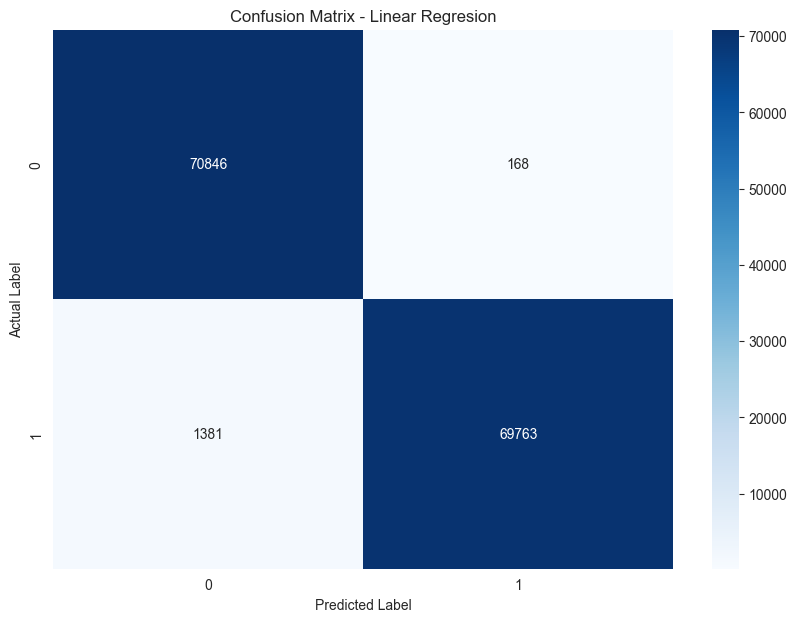

In [10]:
from sklearn.metrics import confusion_matrix

# Convert regression output to binary predictions using a threshold
threshold = 0.5
binary_predictions = (y_pred > threshold).astype(int)

# Construct confusion matrix
conf_matrix = confusion_matrix(y_test, binary_predictions)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Using Seaborn to create the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Linear Regresion')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')